In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
df = pd.read_csv('/content/test-Minimum-Error-Rate-Classifier.txt', header = None, sep = ',')
df

,0,1
0,1,1.0
1,1,-1.0
2,4,5.0
3,-2,2.5
4,0,2.0
5,2,-3.0


**Task 1**

In [5]:
mean1 = [0,0]
mean2 = [2,2]
variance1 = [[0.25, 0.3], [0.3, 1]]
variance2 = [[0.5, 0],[0, 0.5]]
prior = 0.5

In [6]:
determinant1 = np.linalg.det(variance1)
determinant2 = np.linalg.det(variance2)

inverse1 = np.linalg.inv(variance1)
inverse2 = np.linalg.inv(variance2)

In [7]:
class1prob = []
class2prob = []
for i in range (len(df)):
  a = df.loc[i, :].values.tolist()
  b1 = np.subtract(a,mean1)
  b2 = np.subtract(a,mean2)
  c1 = np.array(b1).T.tolist()
  c2 = np.array(b2).T.tolist()
  d1 = np.dot(c1,inverse1)
  d2 = np.dot(c2,inverse2)
  e1 = np.dot(b1, d1)
  e2 = np.dot(b2, d2)

  x1 = np.exp(-0.5 * e1)
  x2 = np.exp(-0.5 * e2)

  y1 = math.sqrt((2*math.pi)** 2 * determinant1)
  y2 = math.sqrt((2*math.pi)** 2 * determinant2)
        
  z1= x1/y1
  z2 = x2/y2

  class1prob.append(z1*prior)
  class2prob.append(z2*prior)

In [8]:
print(class1prob)
print(class2prob)

[0.026095731682525155, 0.0006137127856362326, 2.441940181810876e-15, 4.763869193476966e-13, 0.008740975213082243, 8.523208716126741e-15]
[0.02153927930184863, 7.225623237724323e-06, 3.5974259813700723e-07, 1.394873426608797e-08, 0.0029150244650281935, 2.2103349154917858e-12]


In [9]:
class_label = []
for i in range (len(df)):
  if class1prob[i]>class2prob[i]:
     class_label.append(1)
  else:
     class_label.append(2)
print(class_label)

[1, 1, 2, 2, 1, 2]


**Task 2**

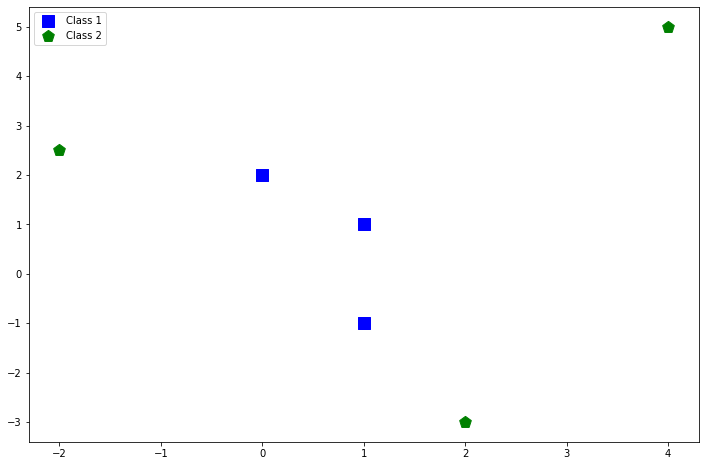

In [10]:
x1 = []
x2 = []
y1 = []
y2 = []

for i in range(len(df)):
  if class_label[i] == 1:
    x1.append(df.iloc[i, 0])
    y1.append(df.iloc[i, 1])
  else:
    x2.append(df.iloc[i, 0])
    y2.append(df.iloc[i, 1])

plt.figure(figsize = (12, 8))
plt.scatter(x1, y1, c = 'b', marker = 's', s = 150, label = 'Class 1')
plt.scatter(x2, y2, c = 'g', marker = 'p', s = 150, label = 'Class 2')
plt.legend()
plt.show()